In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sigfig import round

In [2]:
# parameters
nu = 1e-6 # m^2/s
G = 50e-3 # W/m^2
ubtaub = 0.08 # W/m^2
rhoi = 917 # kg/m^3
rhow = 1000 # kg/m^3
mu = rhow*nu # Pa*s
Latent = 334000 # J/kg
A = 2.4e-24 # ice softness
omega = 1/1000 # transition to Reynolds number
Q = 1 # m^3/s
N0 = 200*1000 # Pa, effective pressure
rd = 10*1000 # m
rt = (omega*Q)/(2*np.pi*nu) # m
R = rt/rd
print('R = '+str(R))

# gap opening
b_scale = (G + ubtaub)/((rhoi*Latent*A)*(N0**3)) # m
print('b = '+str(b_scale)+' m')

# melt scale
M = (12*mu*Q)/(2*np.pi*(b_scale**3)*N0)
print('M = '+str(M))

# # dissipation (old)
# F = ((b_scale**3)*(N0**2))/(12*mu*(G+ubtaub)*(rd**2))
# print('F = '+str(F))

# dissipation (new)
D = (Q*N0)/(2*np.pi*(G+ubtaub)*(rd**2))
# print('D = '+str(F*M))
print('D = '+str(D))

R = 0.015915494309189534
b = 0.022106822342229392 m
M = 0.0008838781920264218
D = 0.002448537586029159


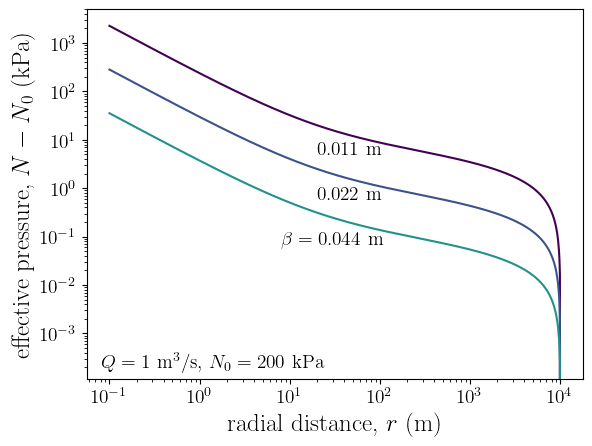

In [11]:
cmap = cm.get_cmap('viridis', 5)
re = np.logspace(0,-5,1000)
bval = 0.5
Nfun = lambda r: 1 + (M/(bval**3))*(-np.log(r) + (R/r) -R)
f = plt.figure()
plt.loglog(re*rd,(Nfun(re)-1)*N0/1000,color=cmap(0))

bval = 1
Nfun = lambda r: 1 + (M/(bval**3))*(-np.log(r) + (R/r) -R)
plt.loglog(re*rd,(Nfun(re)-1)*N0/1000,color=cmap(1))

bval = 2
Nfun = lambda r: 1 + (M/(bval**3))*(-np.log(r) + (R/r) -R)
plt.loglog(re*rd,(Nfun(re)-1)*N0/1000,color=cmap(2))
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.xlabel('radial distance, $r$ (m)',fontsize=18)
plt.ylabel('effective pressure, $N-N_0$ (kPa)',fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.text(20,5,'$0.5[b]$',fontsize=14)
# plt.text(30,0.7,'$[b]$',fontsize=14)
# plt.text(8,0.09,'$\\beta=2[b]$',fontsize=14)
plt.text(20,5,str(round(0.5*b_scale,sigfigs=2))+' m',fontsize=14)
plt.text(20,0.6,str(round(b_scale,sigfigs=2))+' m',fontsize=14)
plt.text(8,0.07,'$\\beta='+str(round(2*b_scale,sigfigs=2))+'$'+' m',fontsize=14)
# plt.text(0.08,0.0002,'$M=8.84\\times10^{-4}$,~$N_0=200$ kPa,~$[b]=0.022$ m',fontsize=14)
# plt.text(0.08,0.0002,'Q = 1 m$^3$/s,~$N_0=200$ kPa,~$M=8.84\\times10^{-4}$',fontsize=14)
plt.text(0.08,0.0002,'$Q = 1$ m$^3$/s,~$N_0=200$ kPa',fontsize=14)
f.savefig("effp_fixedb.pdf",bbox_inches='tight')